In [310]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [311]:
data = pd.read_excel(r"C:\Users\kriti\kriti python\clustering project\SG_2004.xlsx")

In [312]:
data.head()

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,g,gs,mp,fg,fga,fg_percent,x3p,x3pa,x3p_percent,x2p,x2pa,x2p_percent,e_fg_percent,ft,fta,ft_percent,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,18733,2004,3169,Adrian Griffin,NaN,SG,29,5,NBA,HOU,19,1,133,5,18,0.278,1,2,0.500,4,16,0.250,0.306,0,4,0.000,1,18,19,10,7,2,3,17,11
1,18736,2004,3429,Alex Garcia,NaN,SG,23,1,NBA,SAS,2,0,13,1,7,0.143,0,0,NaN,1,7,0.143,0.143,1,2,0.500,0,0,0,0,2,0,1,0,3
2,18737,2004,2763,Allan Houston,NaN,SG,32,11,NBA,NYK,50,50,1799,340,781,0.435,87,202,0.431,253,579,0.437,0.491,157,172,0.913,20,101,121,99,38,2,102,105,924
3,18738,2004,2967,Allen Iverson,NaN,SG,28,8,NBA,PHI,48,47,2040,435,1125,0.387,57,199,0.286,378,926,0.408,0.412,339,455,0.745,34,144,178,324,115,5,209,87,1266
4,18741,2004,3036,Alvin Williams,NaN,SG,29,7,NBA,TOR,56,54,1730,201,496,0.405,26,89,0.292,175,407,0.430,0.431,66,85,0.776,18,132,150,224,55,10,78,114,494


In [313]:
pd.set_option('display.max_columns', None)

In [314]:
print(data)

     seas_id  season  player_id           player  birth_year pos  age  \
0      18733    2004       3169   Adrian Griffin         NaN  SG   29   
1      18736    2004       3429      Alex Garcia         NaN  SG   23   
2      18737    2004       2763    Allan Houston         NaN  SG   32   
3      18738    2004       2967    Allen Iverson         NaN  SG   28   
4      18741    2004       3036   Alvin Williams         NaN  SG   29   
..       ...     ...        ...              ...         ...  ..  ...   
96     19301    2004       2889    Wesley Person         NaN  SG   32   
97     19302    2004       2889    Wesley Person         NaN  SG   32   
98     19303    2004       2889    Wesley Person         NaN  SG   32   
99     19304    2004       3492     Willie Green         NaN  SG   22   
100    19313    2004       3495  Zoran PlaniniÄ‡         NaN  SG   21   

     experience   lg   tm   g  gs    mp   fg   fga  fg_percent  x3p  x3pa  \
0             5  NBA  HOU  19   1   133    5  

In [315]:
pg_columns_to_keep =  ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']



filtered_df_pg = data[pg_columns_to_keep]


print(filtered_df_pg)

      pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0      11    1    7    1   10   19    2   1         0.306       0.278   
1       3    0    2    0    0    0    0   0         0.143       0.143   
2     924   87   38   20   99  121    2  50         0.491       0.435   
3    1266   57  115   34  324  178    5  47         0.412       0.387   
4     494   26   55   18  224  150   10  54         0.431       0.405   
..    ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
96     83   11    5    2   23   18    2   0         0.360       0.308   
97    215   36   11   12   38   74    6   0         0.583       0.476   
98     40    8    3    2    5   25    1   0         0.436       0.333   
99    364   19   26   16   53   65    5   0         0.427       0.401   
100   153    9   13   14   68   55    3   1         0.446       0.411   

     x3p_percent  
0          0.500  
1            NaN  
2          0.431  
3          0.286  
4          0.292  
..       

In [316]:

filtered_df_pg_placeholder = filtered_df_pg.fillna(-1)


C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

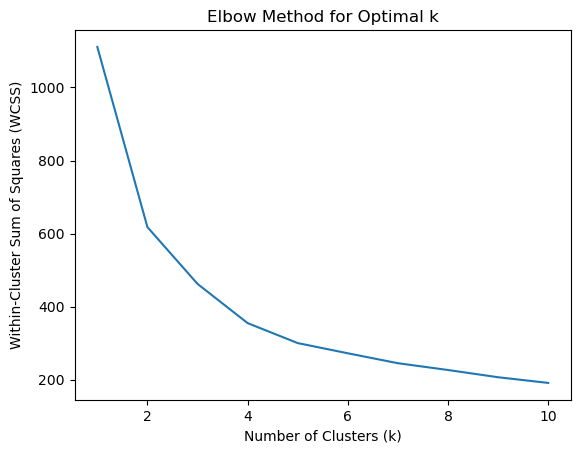

In [317]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer




imputer = SimpleImputer(strategy='mean')
filtered_df_pg_imputed = pd.DataFrame(imputer.fit_transform(filtered_df_pg_placeholder), columns=filtered_df_pg_placeholder.columns)


scaler = StandardScaler()
filtered_df_pg_standardized = scaler.fit_transform(filtered_df_pg_imputed)


wcss = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(filtered_df_pg_standardized)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [318]:
optimal_k = 4

# Perform k-means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(filtered_df_pg_standardized)

# Add the cluster labels to your DataFrame
filtered_df_pg_placeholder['Cluster'] = cluster_labels

# Display the resulting DataFrame with cluster labels
print(filtered_df_pg_placeholder)

      pts  x3p  stl  orb  ast  trb  blk  gs  e_fg_percent  fg_percent  \
0      11    1    7    1   10   19    2   1         0.306       0.278   
1       3    0    2    0    0    0    0   0         0.143       0.143   
2     924   87   38   20   99  121    2  50         0.491       0.435   
3    1266   57  115   34  324  178    5  47         0.412       0.387   
4     494   26   55   18  224  150   10  54         0.431       0.405   
..    ...  ...  ...  ...  ...  ...  ...  ..           ...         ...   
96     83   11    5    2   23   18    2   0         0.360       0.308   
97    215   36   11   12   38   74    6   0         0.583       0.476   
98     40    8    3    2    5   25    1   0         0.436       0.333   
99    364   19   26   16   53   65    5   0         0.427       0.401   
100   153    9   13   14   68   55    3   1         0.446       0.411   

     x3p_percent  Cluster  
0          0.500        1  
1         -1.000        3  
2          0.431        2  
3          

C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kriti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


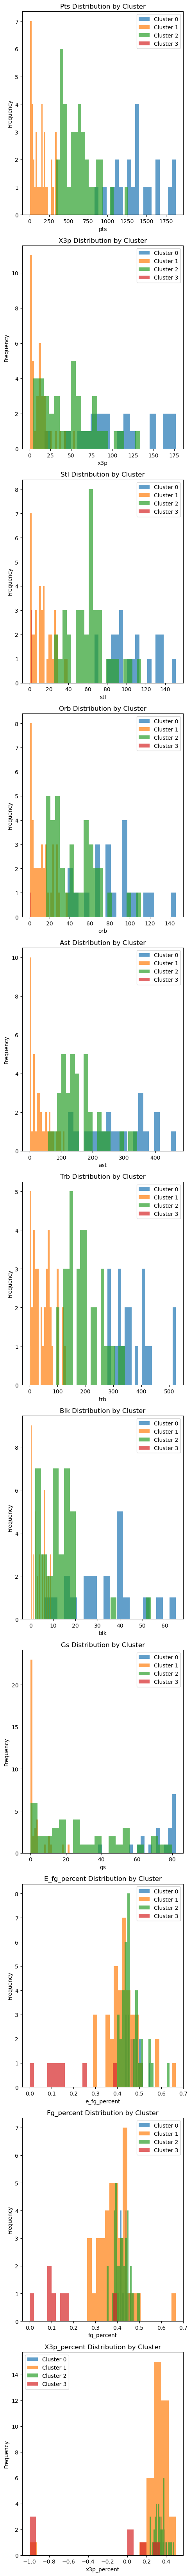

In [319]:
import matplotlib.pyplot as plt


features_to_plot = ['pts', 'x3p', 'stl', 'orb', 'ast', 'trb', 'blk', 'gs', 'e_fg_percent', 'fg_percent', 'x3p_percent']


fig, axes = plt.subplots(nrows=len(features_to_plot), ncols=1, figsize=(5, 6 * len(features_to_plot)))
r
for i, feature in enumerate(features_to_plot):
    for cluster in range(optimal_k):
  
        cluster_data = filtered_df_pg_placeholder[filtered_df_pg_placeholder['Cluster'] == cluster]
        

        axes[i].hist(cluster_data[feature], bins=20, alpha=0.7, label=f'Cluster {cluster}')


    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].set_title(f'{feature.capitalize()} Distribution by Cluster')


plt.tight_layout()
plt.show()
